In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/kanishkbhagat/DS/Datasets/NLP/Twitter Sentiment/twitter_training.csv', names = ['ID','Company','Sentiment','Tweet'])
df.head()

,ID,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df = df.drop(['ID', 'Company'], axis = 1)  
df = df.dropna(subset = ['Tweet'])
df = df[df['Sentiment'] != 'Irrelevant']

In [4]:
df.isnull().sum()

Sentiment    0
Tweet        0
dtype: int64

In [5]:
def preprocess(tweet):
    
    tweet = re.sub(r'http\S+|https\S+|www\S+', ' ', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'@\w+|#\w+', ' ', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet, flags = re.MULTILINE)
    tweet = word_tokenize(tweet)
    stopword = stopwords.words('english')
    tweet = [word for word in tweet if word not in stopword and len(word) > 2]
    return ' '.join(tweet)

df['Tweet'] = df['Tweet'].apply(preprocess)

In [6]:
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

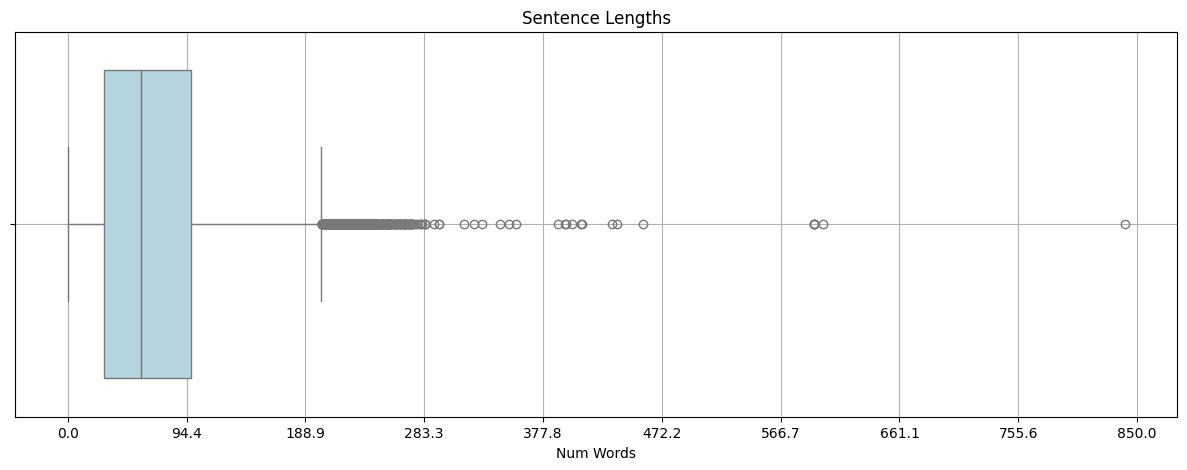

In [7]:
max_len = [len(i) for i in df['Tweet']]

plt.figure(figsize = (15,5))
sns.boxplot(max_len, orient = 'h', color = 'lightblue')
plt.xticks(np.linspace(0, 850, 10))
plt.grid()
plt.title('Sentence Lengths')
plt.xlabel('Num Words')
plt.show()

In [8]:
tokenizer = Tokenizer(5000, oov_token = '<OOV>')
tokenizer.fit_on_texts(df['Tweet'])
tweets = tokenizer.texts_to_sequences(df['Tweet'])
tweet = pad_sequences(tweets, 
              maxlen = 300, 
              padding = 'post',
              truncating = 'post')

In [78]:
token = Tokenizer()
tokenizer.fit_on_texts(df['Tweet'])
words = tokenizer.word_counts
sorted_words = sorted(words.items(), key = lambda x : x[1], reverse = True)

for idx, (i, j) in enumerate(sorted_words):
    print(f'{idx} : {i} {j}')

0 : com 40665
1 : game 39475
2 : the 24885
3 : like 19605
4 : pic 18395
5 : twitter 17720
6 : get 17300
7 : play 15455
8 : johnson 15200
9 : one 14850
10 : good 14525
11 : new 14495
12 : really 13615
13 : this 13310
14 : love 12965
15 : time 12840
16 : unk 12460
17 : shit 11570
18 : still 10805
19 : people 10790
20 : amazon 10430
21 : got 10400
22 : games 9850
23 : facebook 9795
24 : best 9770
25 : playing 9525
26 : microsoft 9340
27 : dead 9200
28 : see 9185
29 : fuck 9060
30 : great 9030
31 : even 8940
32 : xbox 8760
33 : rhandlerr 8720
34 : fucking 8625
35 : google 8520
36 : red 8515
37 : please 8445
38 : you 8260
39 : back 8180
40 : home 8080
41 : much 7900
42 : going 7835
43 : nvidia 7445
44 : verizon 7400
45 : fix 7330
46 : fifa 7295
47 : first 7120
48 : know 7110
49 : make 7100
50 : and 6990
51 : would 6900
52 : fun 6805
53 : day 6790
54 : today 6655
55 : borderlands 6505
56 : also 6370
57 : bad 6340
58 : ever 6335
59 : want 6230
60 : redemption 6070
61 : wait 5995
62 : twitch 5

In [85]:
model = tf.keras.Sequential([
        layers.Input((500,)),
        layers.Embedding(input_dim = 5000, output_dim = 32,),
    
        layers.Bidirectional(layers.LSTM(64, return_sequences = True)),
        layers.Dropout(0.5),
    
        layers.Bidirectional(layers.LSTM(32)),
        layers.Dropout(0.5),
    
        layers.Dense(64, activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 500, 128)       │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,235 (997.01 KB)

 Trainable params: 255,235 (997.01 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(tweet, 
                    df['Sentiment'], 
                    batch_size = 32, 
                    epochs = 5,
                    validation_split = 0.2)

Epoch 1/5
  79/1528 ━━━━━━━━━━━━━━━━━━━━ 2:51 119ms/step - accuracy: 0.3555 - loss: 1.0969


KeyboardInterrupt



In [91]:
tweet.shape

(61121, 500)